In [29]:
import pandas as pd

hotels = "C:\\Users\\rache\\Downloads\\cse2600\\airbnb_data\\Airbnb_site_hotel_fixed new.csv" #path for csv

df = pd.read_csv(hotels) #read in the data
df_cleaned = df.dropna(subset=['price'])

print('Rows:', len(df)) #num of rows
print('Columns:', len(df.columns)) #num of columns

Rows: 86186
Columns: 23


In [30]:
df_cleaned['area'] = df_cleaned['area'].map({'North America': 1, 'Europe': 2, 'Asia': 3})

df_cleaned['city'] = df_cleaned['city'].map({'Toronto': 1, 'NewYork': 2, 'Amsterdam': 3, 'berlin': 4, 'Dublin': 5, 'Hongkong': 6,'Munich': 7, 'Singapore': 8, 'sydney': 9, 'tokyo': 10, 'taipei': 11})

#df['bathrooms'] = df['bathrooms'].astype(str).str.replace(',', '.')



C:\Users\rache\AppData\Local\Temp\ipykernel_17604\2529759003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['area'] = df_cleaned['area'].map({'North America': 1, 'Europe': 2, 'Asia': 3})
C:\Users\rache\AppData\Local\Temp\ipykernel_17604\2529759003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['city'] = df_cleaned['city'].map({'Toronto': 1, 'NewYork': 2, 'Amsterdam': 3, 'berlin': 4, 'Dublin': 5, 'Hongkong': 6,'Munich': 7, 'Singapore': 8, 'sydney': 9, 'tokyo': 10, 'taipei': 11

In [18]:
def convert_decimal_separator_in_csv(input_csv_path, output_csv_path):
    """
    Converts decimal separators from comma to period in all columns of a CSV file.

    Args:
        input_csv_path (str): The path to the input CSV file.
        output_csv_path (str): The path to save the modified CSV file.
    """
    
    # Read the CSV file, specifying the comma as the decimal separator
    df = pd.read_csv(input_csv_path, decimal=',')

    # Save the DataFrame to a new CSV file, using the default period as decimal separator
    df.to_csv(output_csv_path, index=False, decimal='.')
    print(f"Successfully converted decimal separators and saved to {output_csv_path}")

convert_decimal_separator_in_csv(hotels, "C:\\Users\\rache\\Downloads\\cse2600\\airbnb_data\\Airbnb_site_hotel_fixed new.csv")

Successfully converted decimal separators and saved to C:\Users\rache\Downloads\cse2600\airbnb_data\Airbnb_site_hotel_fixed new.csv


In [10]:
print(df['city'].unique())

['Toronto' 'NewYork' 'Amsterdam' 'berlin' 'Dublin' 'Hongkong' 'Munich'
 'Singapore' 'sydney' 'tokyo' 'taipei']


In [ ]:
print(df['price'].isna().sum()) #5424

5424


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)

train, test = train_test_split(df_cleaned, train_size=68948, random_state=42)
#chose 68948 cuz thats 80%

# Split data into features (X) and target (y) for training and testing
y_train = train['price']
X_train = train.drop(['price', 'name', 'host_id', 'consumer', 'host_name'], axis=1)
y_test = test['price']
X_test = test.drop(['price', 'name', 'host_id', 'consumer', 'host_name'], axis=1)

In [32]:
from sklearn.model_selection import cross_validate

# Range of possible leaf node counts to test
leaf_sizes = range(2,21)

cv_scores = []

# Perform cross-validation for each leaf size
for size in leaf_sizes:
    model = DTC(max_leaf_nodes=size, random_state=2)
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores['test_score'])
    cv_scores.append(mean_score)
    print(f"max_leaf_nodes={size}: mean CV accuracy = {mean_score:.5f}")

# Find the best number of leaf nodes
best_size = leaf_sizes[np.argmax(cv_scores)]
print(f"\nBest number of leaf nodes: {best_size}")

# Train final model with this optimal size
final_model = DTC(max_leaf_nodes=best_size, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate on test data
y_pred = final_model.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred)

print(f"Test misclassification error (best model): {test_error:.4f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rache\anaconda3\envs\islp\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rache\anaconda3\envs\islp\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\rache\anaconda3\envs\islp\Lib\site-packages\sklearn\tree\_classes.py", line 1024, in fit
    super()._fit(
    ~~~~~~~~~~~~^
        X,
        ^^
    ...<2 lines>...
        check_input=check_input,
        ^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\rache\anaconda3\envs\islp\Lib\site-packages\sklearn\tree\_classes.py", line 294, in _fit
    check_classification_targets(y)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\rache\anaconda3\envs\islp\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
    ...<3 lines>...
    )
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [33]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import mean_squared_error

leaf_sizes = list(range(2,21))
cv_scores = []

for size in leaf_sizes:
    model = DTR(max_leaf_nodes=size, random_state=2)
    # use neg_mean_squared_error or r2 for scoring
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores['test_score'])   # negative MSE
    cv_scores.append(mean_score)
    print(f"max_leaf_nodes={size}: mean CV neg-MSE = {mean_score:.5f}")

best_size = leaf_sizes[np.argmax(cv_scores)]
print("\nBest number of leaf nodes:", best_size)

final_model = DTR(max_leaf_nodes=best_size, random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE (best model): {test_mse:.4f}")

max_leaf_nodes=2: mean CV neg-MSE = -125539.95723
max_leaf_nodes=3: mean CV neg-MSE = -121728.31926
max_leaf_nodes=4: mean CV neg-MSE = -119176.21948
max_leaf_nodes=5: mean CV neg-MSE = -117164.32226
max_leaf_nodes=6: mean CV neg-MSE = -112986.66347
max_leaf_nodes=7: mean CV neg-MSE = -114584.68113
max_leaf_nodes=8: mean CV neg-MSE = -114217.16696
max_leaf_nodes=9: mean CV neg-MSE = -113551.54549
max_leaf_nodes=10: mean CV neg-MSE = -113088.58901
max_leaf_nodes=11: mean CV neg-MSE = -111977.43280
max_leaf_nodes=12: mean CV neg-MSE = -112759.87092
max_leaf_nodes=13: mean CV neg-MSE = -112200.91241
max_leaf_nodes=14: mean CV neg-MSE = -112455.71720
max_leaf_nodes=15: mean CV neg-MSE = -111830.74292
max_leaf_nodes=16: mean CV neg-MSE = -110679.25575
max_leaf_nodes=17: mean CV neg-MSE = -106077.78401
max_leaf_nodes=18: mean CV neg-MSE = -105355.68792
max_leaf_nodes=19: mean CV neg-MSE = -106021.82199
max_leaf_nodes=20: mean CV neg-MSE = -105328.73779

Best number of leaf nodes: 20
Test MSE

In [34]:
tree = DTR(max_leaf_nodes=20)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,20
,min_impurity_decrease,0.0
,ccp_alpha,0.0


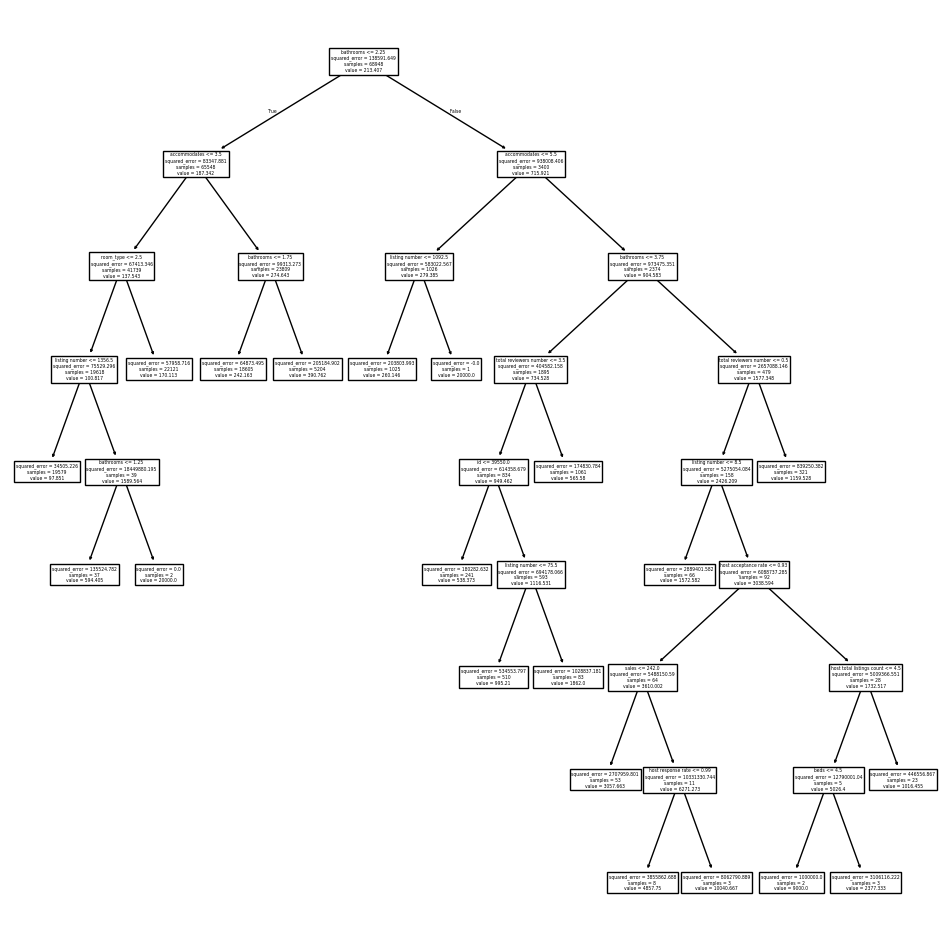

In [35]:
from matplotlib.pyplot import subplots
feature_names = list(X_train.columns)
ax = subplots(figsize=(12,12))[1]
plot_tree(tree,
          feature_names=feature_names,
          ax=ax);